# Importing Packages

In [1]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

# Loading Data

In [2]:
# Define the parameters
subject = 1 # use data from subject 1
runs = [6, 10, 14] # use only hand and feet motor imagery runs
#Get data and locate in to given path
files = eegbci.load_data(subject, runs, '../datasets/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
#Set Standard Channel Locations
eegbci.standardize(raw_obj) # set channel names
montage = make_standard_montage('standard_1005')
raw_obj.set_montage(montage)

Attempting to create new mne-python configuration file:
/home/joshua/.mne/mne-python.json
Download complete in 41s (7.4 MB)
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 

<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

# Extract Raw EEG Data from mne Data Object

In [3]:
raw_data = raw_obj.get_data() # OR raw_data = raw_obj._data
print("Number of channels: ", str(len(raw_data)))
print("Number of samples: ", str(len(raw_data[0])))
# Get Sampling Frequency
fs=raw_obj.info['sfreq']
print("Sampling Frequency: ", str(fs))

Number of channels:  64
Number of samples:  60000
Sampling Frequency:  160.0


# Plot the Raw Dataset using Matplotlib

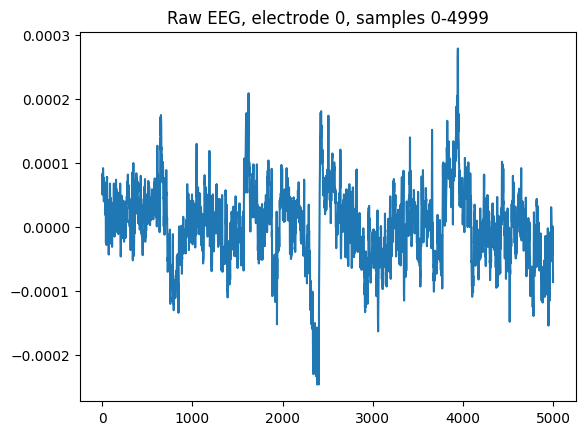

In [4]:
plt.plot(raw_data[0,:4999])
plt.title("Raw EEG, electrode 0, samples 0-4999")
plt.show()

Y is in Amplitude
X is Frequence + Phase

# Plot the raw mne object file using mne plot function

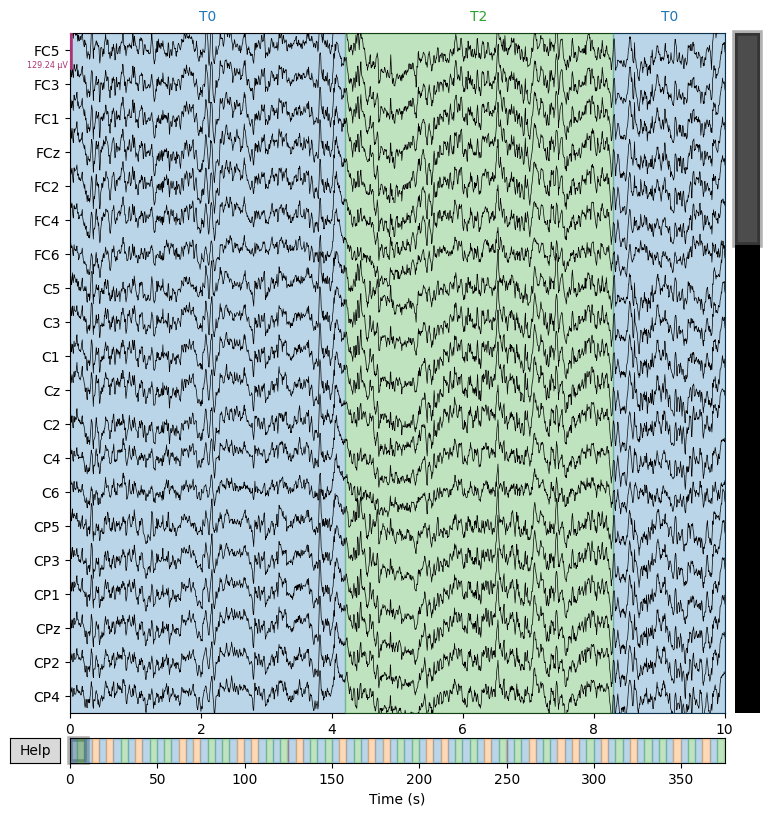

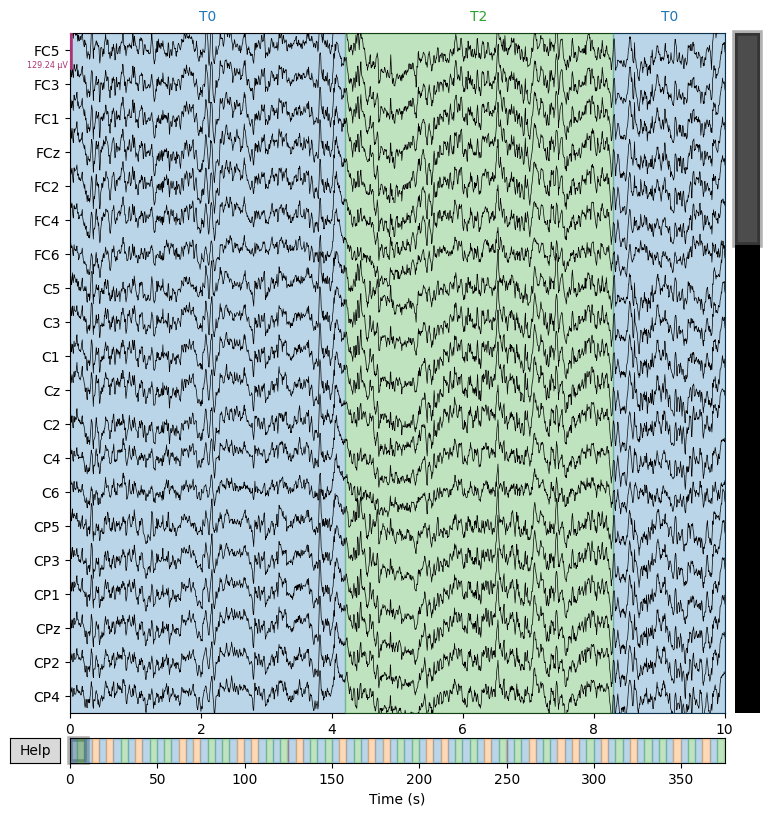

In [6]:
raw_obj.plot(scalings='auto',show=True)

Different Colors show the different events

# Converting Raw data to Epoched data

In [7]:
#Extract events from raw data
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
print(event_ids)
# The format of events is [Event Onset, Duration, Event ID]
print(events[0:2])

# Used Annotations descriptions: ['T0', 'T1', 'T2']
# {'T0': 1, 'T1': 2, 'T2': 3}
# [[ 0 0 1]
# [672 0 3]]

Used Annotations descriptions: ['T0', 'T1', 'T2']
{'T0': 1, 'T1': 2, 'T2': 3}
[[  0   0   1]
 [672   0   3]]


T0 corresponds to rest

T1 corresponds to onset of motion (real or imagined) of the
    left fist (in runs 3, 4, 7, 8, 11, and 12)
    both fists (in runs 5, 6, 9, 10, 13, and 14)

T2 corresponds to onset of motion (real or imagined) of the
    right fist (in runs 3, 4, 7, 8, 11, and 12)
    both feet (in runs 5, 6, 9, 10, 13, and 14)